# Healpy cheat sheet

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

`nside` is the resolution of the map, should be set to a power of 2 (128 is usually fine)

In [3]:
nside1 = 16
nside2 = 32
nside3 = 64
nside4 = 128

`snyfast` takes in an array of $C_\ell$ and `nside` to generate a map

`anafast` takes a map and outputs the associated $C_\ell$

# Creating maps

In [16]:
Lmax = 384
ells = np.arange(1,Lmax+1)

c_ell_uniform = np.ones_like(ells) #uniform power spectrum
c_ell_uniform[0] = 0 #reset the monopole moment
c_ell_uniform[1] = 0 #reset the dipole moment

c_ell = np.arange(1,Lmax+1) #creates some C_ell that just increase from 1 to 385. This is a very boring power spectrum
c_ell[0] = 0 #this sets what will by the C_1 element =0 
np.insert(c_ell, 0, 0); #inserts the C_0 element to be 0. This avoids a division by 0 at any other point

In [17]:
map1 = hp.synfast(c_ell, nside1)
map2 = hp.synfast(c_ell, nside2)
map3 = hp.synfast(c_ell, nside3)
map4 = hp.synfast(c_ell, nside4)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


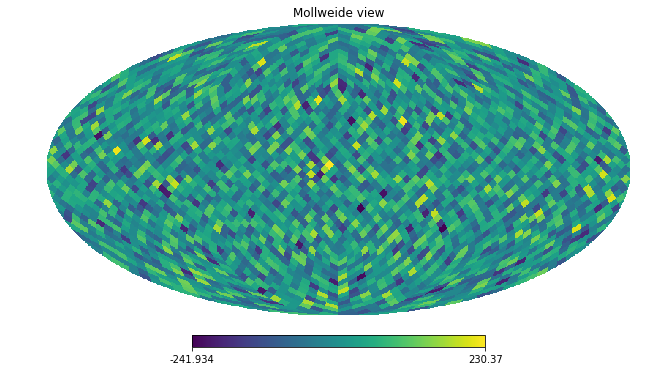

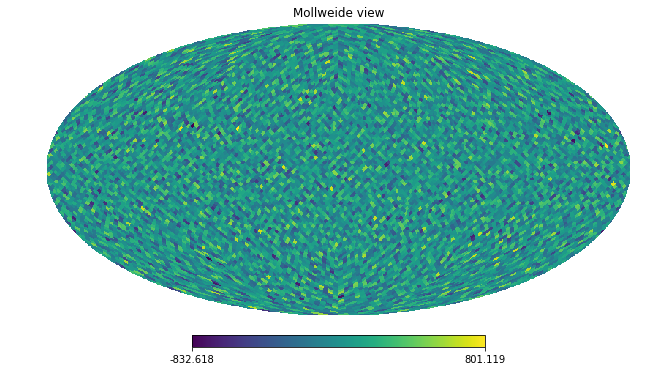

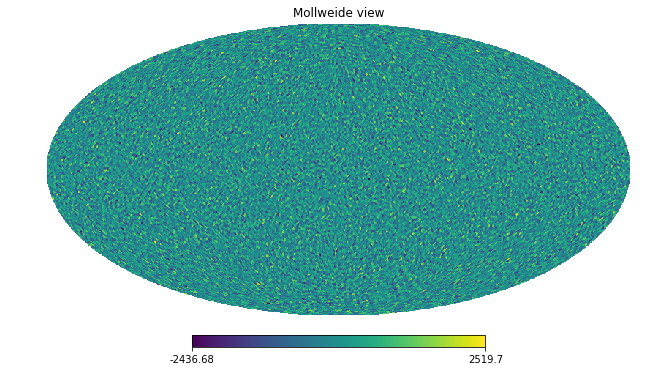

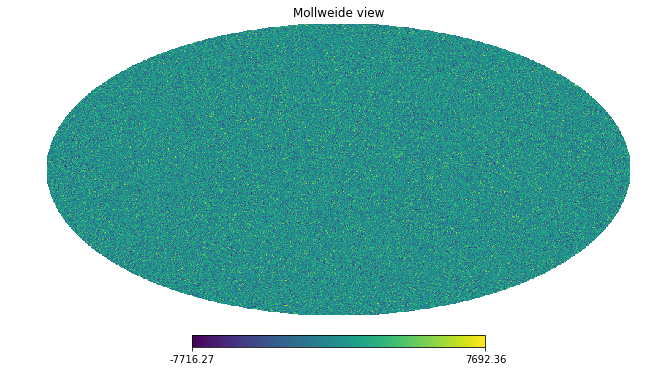

In [18]:
#these have linear power spectra
hp.mollview(map1)
hp.mollview(map2)
hp.mollview(map3)
hp.mollview(map4)

In [19]:
#uniform power spectra
map1_uniform = hp.synfast(c_ell_uniform, nside1)
map2_uniform = hp.synfast(c_ell_uniform, nside2)
map3_uniform = hp.synfast(c_ell_uniform, nside3)
map4_uniform = hp.synfast(c_ell_uniform, nside4)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


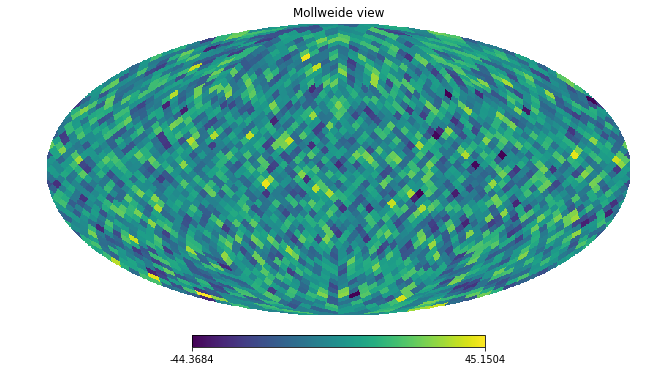

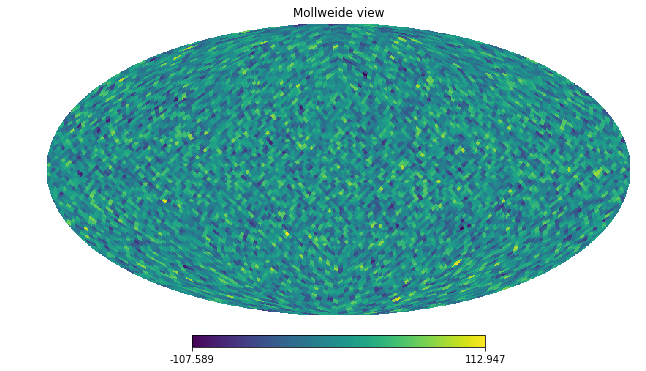

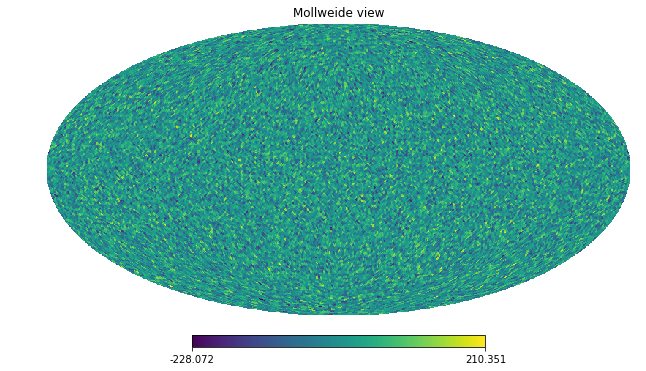

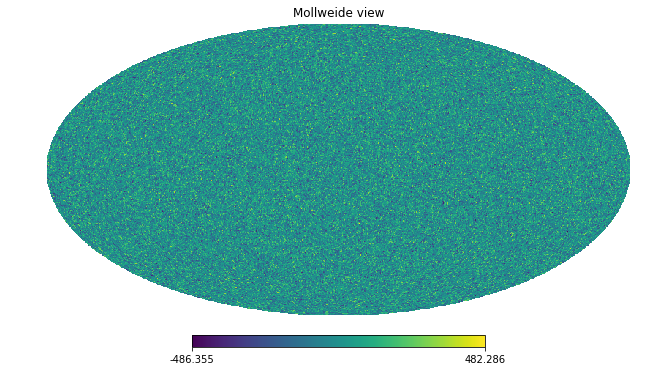

In [20]:
hp.mollview(map1_uniform)
hp.mollview(map2_uniform)
hp.mollview(map3_uniform)
hp.mollview(map4_uniform)

# Other projections

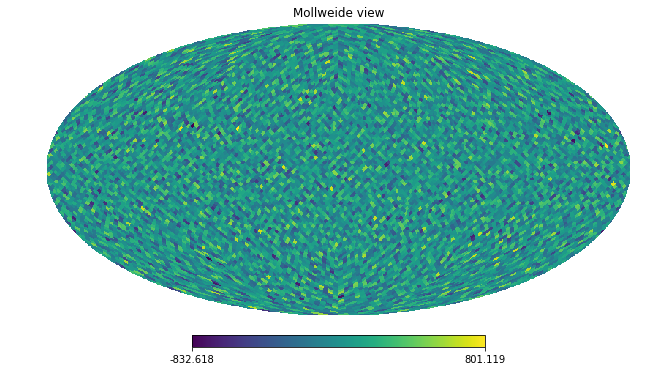

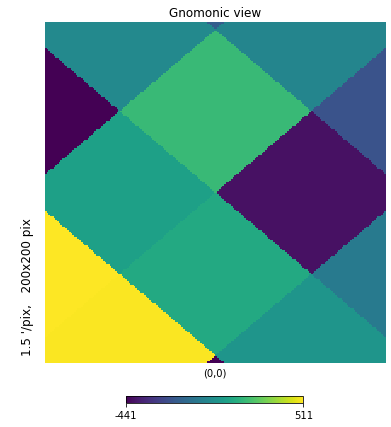

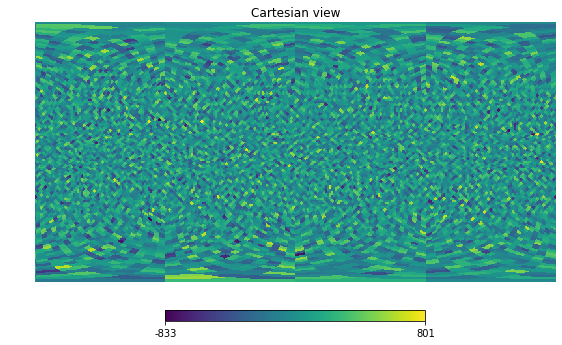

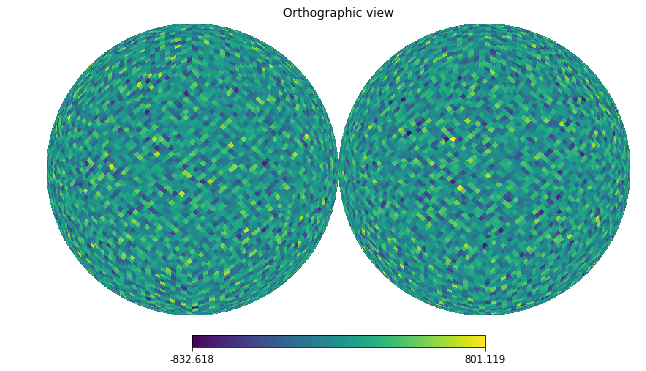

In [24]:
hp.mollview(map2)
hp.gnomview(map2)
hp.cartview(map2)
hp.orthview(map2)

# Power spectra

Recall that the power spectrum is simply the dependence of the $C_\ell$ on $\ell$. If we have an array of the $C_\ell$ and the $\ell$ then we can plot the input power spectrum

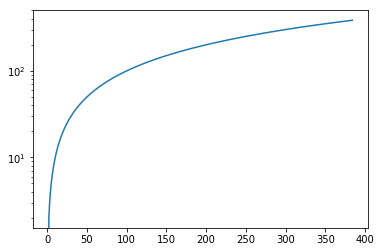

In [31]:
semilogy(ells,c_ell) #semi log plot of the linear  

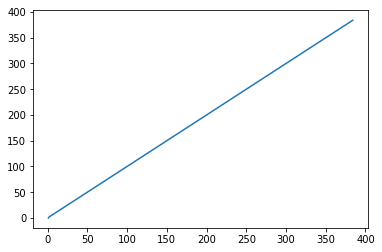

In [32]:
plot(ells, c_ell)

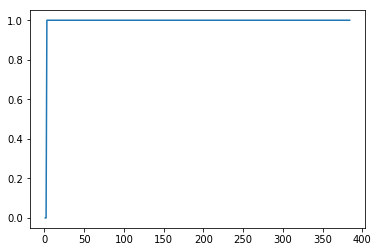

In [34]:
plot(ells, c_ell_uniform)

If we wish to extract power spectra from a given map we can do so using `anafast`.

In [75]:
calculated_cls_1 = hp.anafast(map1)
calculated_cls_2 = hp.anafast(map2)
calculated_cls_3 = hp.anafast(map3)
calculated_cls_4 = hp.anafast(map4)

In [78]:
restricted_ell_1 = ells[:calculated_cls_1.shape[0]] #restricts the upper limit on ell so that these can be plotted together
restricted_c_ell_1 = c_ell[:calculated_cls_1.shape[0]]

restricted_ell_2 = ells[:calculated_cls_2.shape[0]] #restricts the upper limit on ell so that these can be plotted together
restricted_c_ell_2 = c_ell[:calculated_cls_2.shape[0]]

restricted_ell_3 = ells[:calculated_cls_3.shape[0]] #restricts the upper limit on ell so that these can be plotted together
restricted_c_ell_3 = c_ell[:calculated_cls_3.shape[0]]

restricted_ell_4 = ells[:calculated_cls_4.shape[0]] #restricts the upper limit on ell so that these can be plotted together
restricted_c_ell_4 = c_ell[:calculated_cls_4.shape[0]]

this is a comparison of the input power spectrum to the extracted power spectrum.

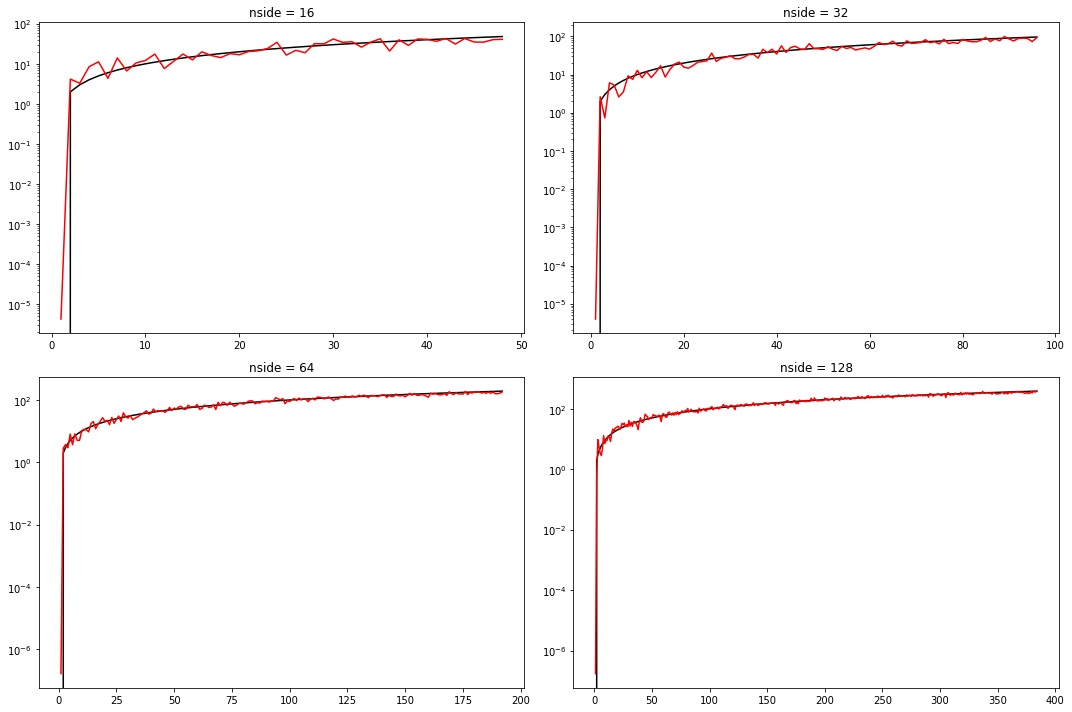

In [109]:
fig, ax = plt.subplots(figsize=(15, 10))
subplot(2,2,1)
semilogy(restricted_ell_1, restricted_c_ell_1, 'k')
semilogy(restricted_ell_1, calculated_cls_1, 'r')
title('nside = 16')


subplot(2,2,2)
semilogy(restricted_ell_2, restricted_c_ell_2, 'k')
semilogy(restricted_ell_2, calculated_cls_2, 'r')
title('nside = 32')

subplot(2,2,3)
semilogy(restricted_ell_3, restricted_c_ell_3, 'k')
semilogy(restricted_ell_3, calculated_cls_3, 'r')
title('nside = 64')

subplot(2,2,4)
semilogy(restricted_ell_4, restricted_c_ell_4, 'k')
semilogy(restricted_ell_4, calculated_cls_4, 'r')
title('nside = 128')

tight_layout()

notice that the higher the resolution, the higher the $\ell$ accessible is (as $\ell$ corresponds to an angular size in the sky), and the better fitting to the input power spectrum is.